# Dataset 2: Movies Dataset from Pirated Sites

In [1]:
import pandas as pd

### 读取数据

In [2]:
df = pd.read_csv('movies_dataset.csv')

### 1. 数据摘要和可视化

#### 数据摘要

In [3]:
df.columns

Index(['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads',
       'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

### 简要分析
该数据集是一个盗版网站的电影数据。包含以下标签：
<br>
* id：电影的唯一id；
* title：电影的名字；
* storyline：电影的简短描述；
* views：每部电影的点击量；
* downloads：每部电影的下载量；
* IMDb-rating：一种评级；
* appropriate_for：R级、PG-13、TV-14等；
* language：电影语言，可以是多种语言；
* industry：好莱坞、宝莱坞等等；
* posted_date：电影在平台上发布的时间；
* release_date：电影在全球上映的时间；
* runtime：播放时间，单位是分钟；
* director：导演的姓名；
* writer：所有作者的列表。

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20548 non-null  int64  
 1   IMDb-rating      19707 non-null  float64
 2   appropriate_for  11072 non-null  object 
 3   director         18610 non-null  object 
 4   downloads        20547 non-null  object 
 5   id               20548 non-null  int64  
 6   industry         20547 non-null  object 
 7   language         20006 non-null  object 
 8   posted_date      20547 non-null  object 
 9   release_date     20547 non-null  object 
 10  run_time         18780 non-null  object 
 11  storyline        18847 non-null  object 
 12  title            20547 non-null  object 
 13  views            20547 non-null  object 
 14  writer           18356 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 2.4+ MB


由此看出，有6个数值数据，23个标称数据。现在，对标称数据作频数统计。

In [5]:
object_columns = df.select_dtypes(include='object').columns

# 计算标称属性的频数
frequecy_list = [df[index].value_counts() for index in object_columns]
[print(frequecy) for frequecy in frequecy_list]

R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawan, Shivani Thakur      1
Suman Mukhopadhyay             

[None, None, None, None, None, None, None, None, None, None, None, None]

统计数值属性的五数统计。

In [6]:
# 数值属性的5数统计
df.describe().loc[['min', '25%', '50%', '75%', 'max'], :]

,Unnamed: 0,IMDb-rating,id
min,0.00,1.1,1.00
25%,5136.75,4.8,96122.25
50%,10273.50,5.7,264457.50
75%,15410.25,6.6,354561.25
max,20547.00,9.9,372092.00


统计缺失值。

In [7]:
# 缺失值的个数
missing_values_count = df.isna().sum()
missing_values_count

Unnamed: 0            0
IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
id                    0
industry              1
language            542
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64

经过检查，发现`downloads`、`id`、`views`三个属性表示数值属性，因此将其转为数值类型。

In [8]:
df["downloads"] = df["downloads"].apply(pd.to_numeric, errors='coerce')
df["id"] = df["id"].apply(pd.to_numeric, errors='coerce')
df["views"] = df["views"].apply(pd.to_numeric, errors='coerce')
nominal_col = [i for i in df.dtypes._stat_axis.values.tolist() if df.dtypes[i]=='object']
print(nominal_col)
value_col = [i for i in df.dtypes._stat_axis.values.tolist() if i not in nominal_col]
print(value_col)

['appropriate_for', 'director', 'industry', 'language', 'posted_date', 'release_date', 'run_time', 'storyline', 'title', 'writer']
['Unnamed: 0', 'IMDb-rating', 'downloads', 'id', 'views']


计算标称属性取值频数

In [9]:
for i, column in enumerate(nominal_col):
    print(f"--------------------------{column}--------------------------")
    y = df[column].value_counts()
    print(y)

--------------------------appropriate_for--------------------------
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64
--------------------------director--------------------------
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dy

#### 数据可视化

In [10]:
import numpy as np
import matplotlib.pyplot as plt

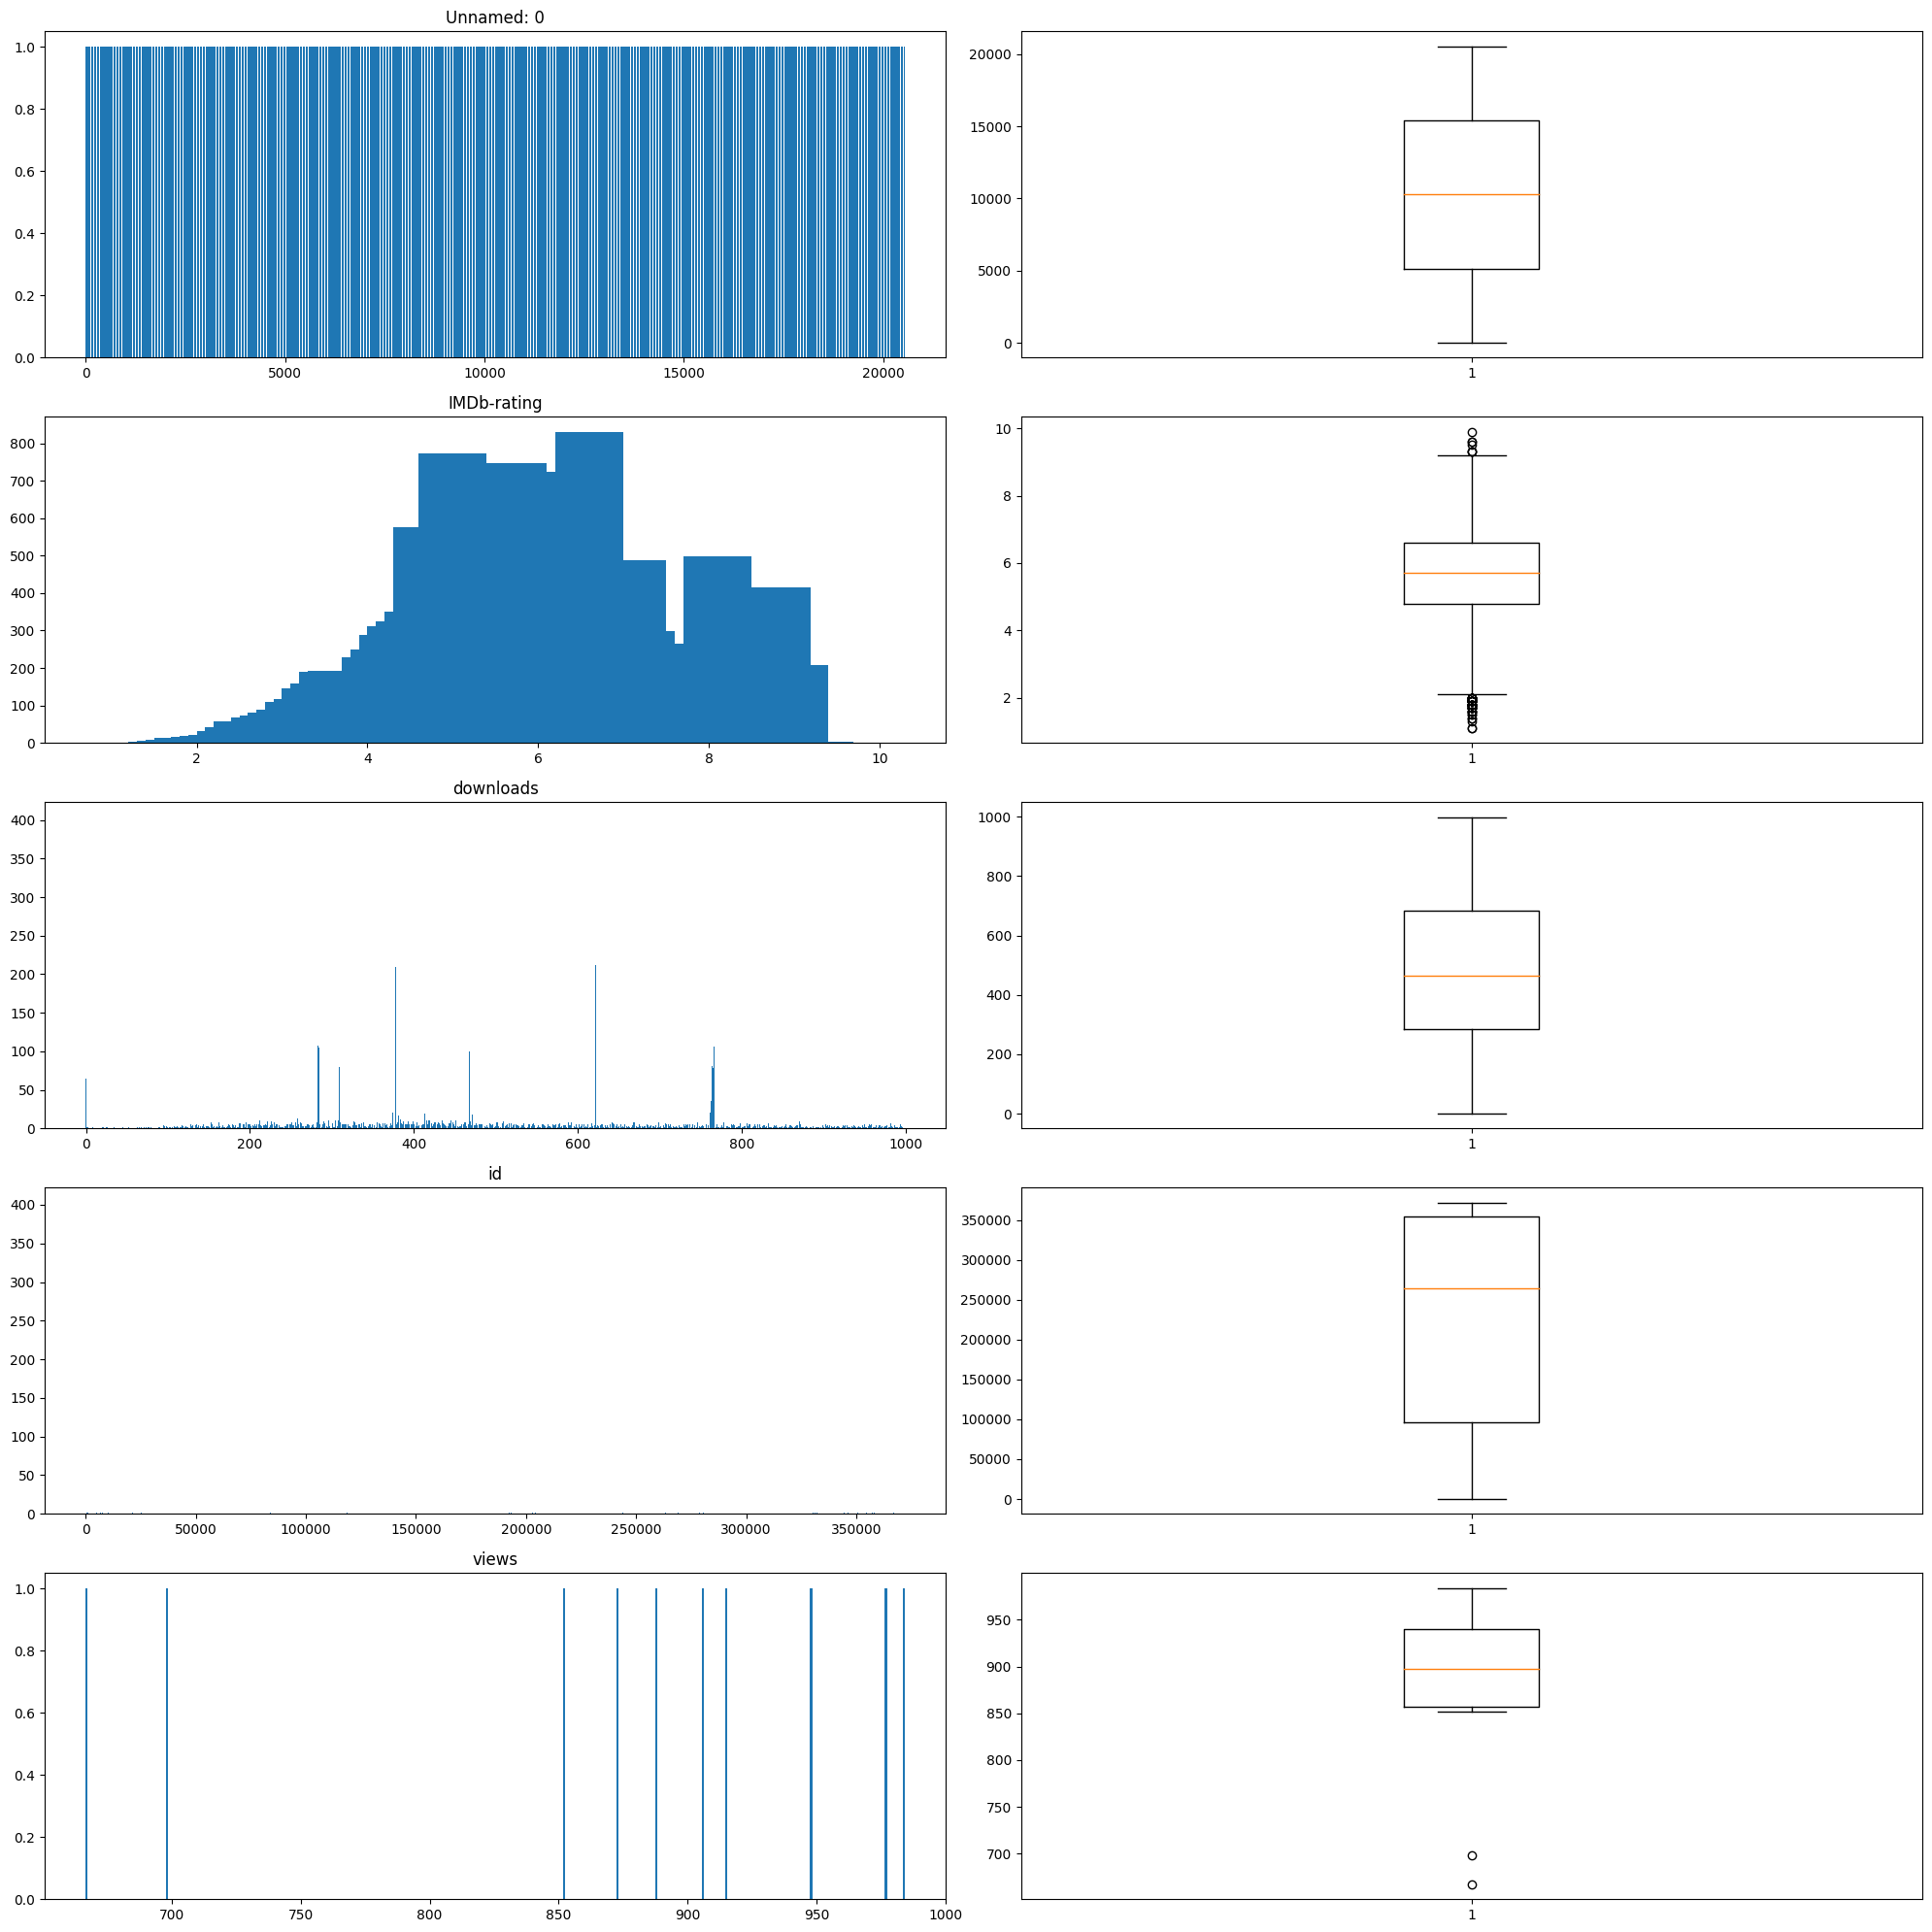

In [11]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(value_col):
    plt.subplot(5, 2, 2*(i+1)-1)
    x = df[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(df[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.tight_layout()
    plt.bar(x, y)
    plt.subplot(5, 2, 2*(i+1))
    plt.boxplot(df[col][~np.isnan(df[col])])
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()

### 2. 数据缺失的处理

获取确实数据的属性。

In [12]:
na_columns = df.loc[:, (df.isnull().any())].columns
na_columns

Index(['IMDb-rating', 'appropriate_for', 'director', 'downloads', 'industry',
       'language', 'posted_date', 'release_date', 'run_time', 'storyline',
       'title', 'views', 'writer'],
      dtype='object')

1. 将缺失部分剔除

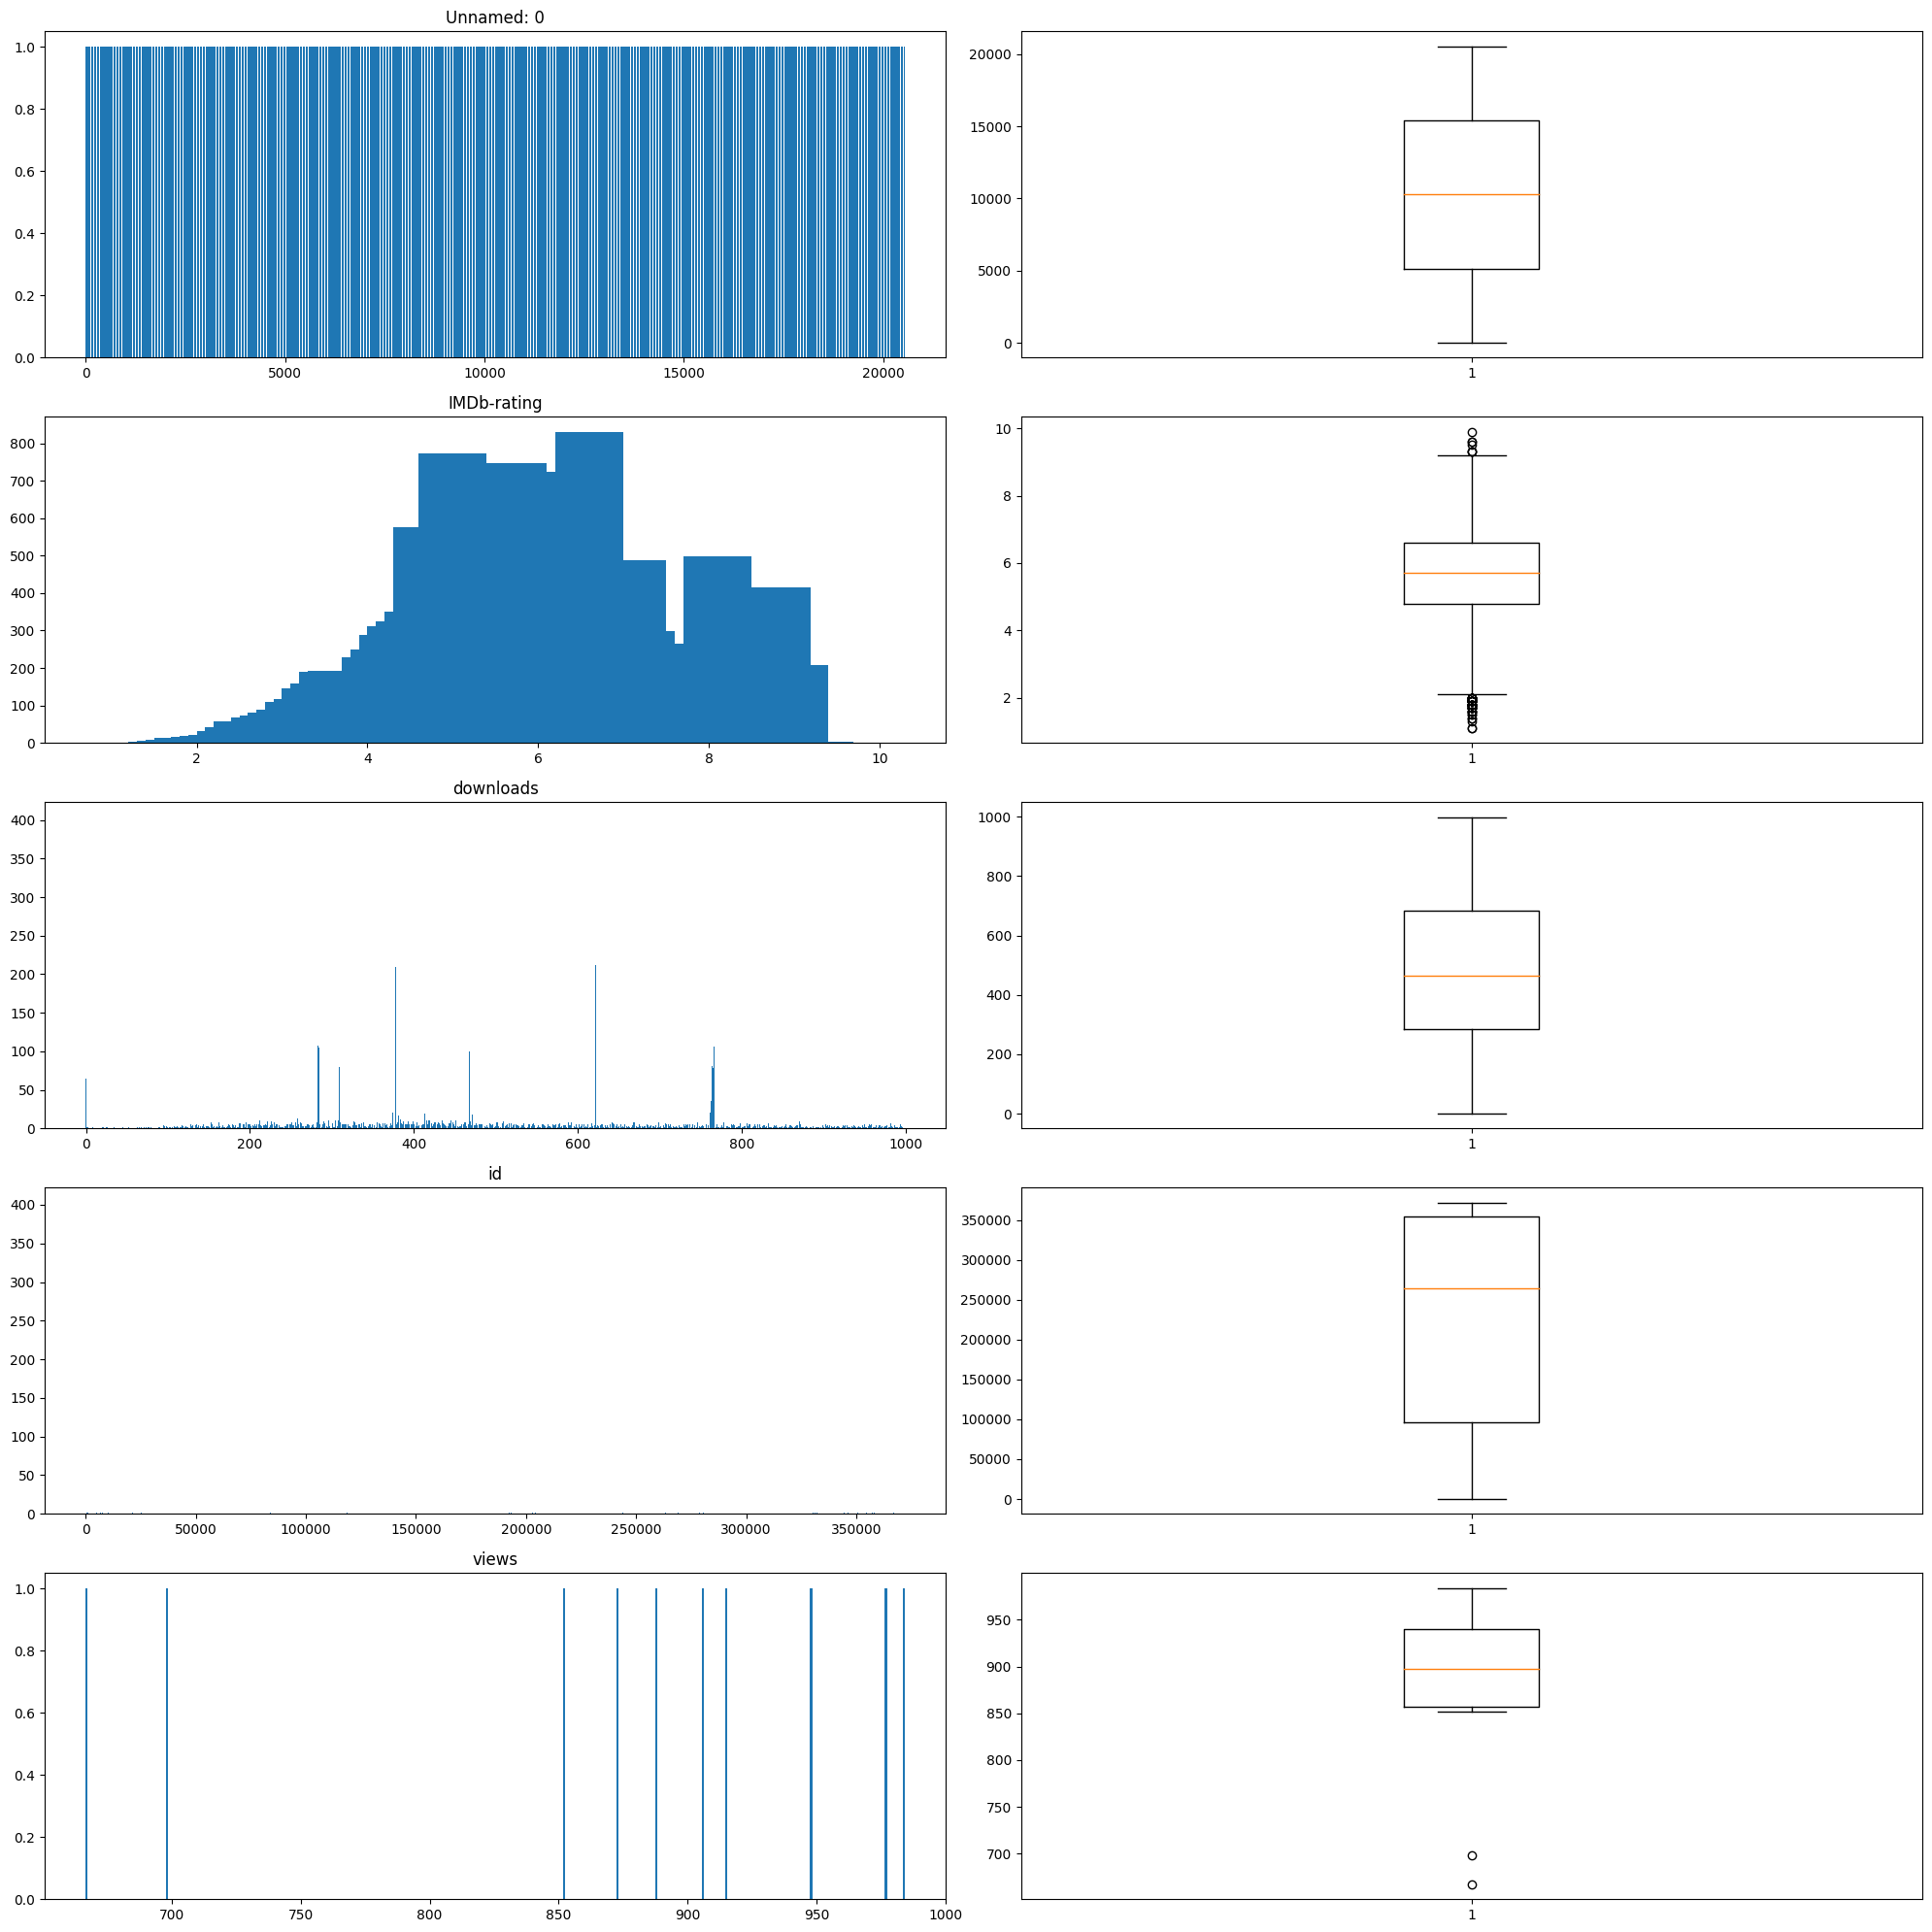

In [13]:
process_col = ["IMDb-rating", "downloads", "views"]
# 将缺失部分剔除
df.dropna(axis=0,subset = process_col)
plt.figure(figsize=(20, 20))
for i, col in enumerate(value_col):
    plt.subplot(5, 2, 2*(i+1)-1)
    x = df[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(df[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.tight_layout()
    plt.bar(x, y)
    plt.subplot(5, 2, 2*(i+1))
    plt.boxplot(df[col][~np.isnan(df[col])])

plt.show()

2. 用最高频率值来填补缺失值

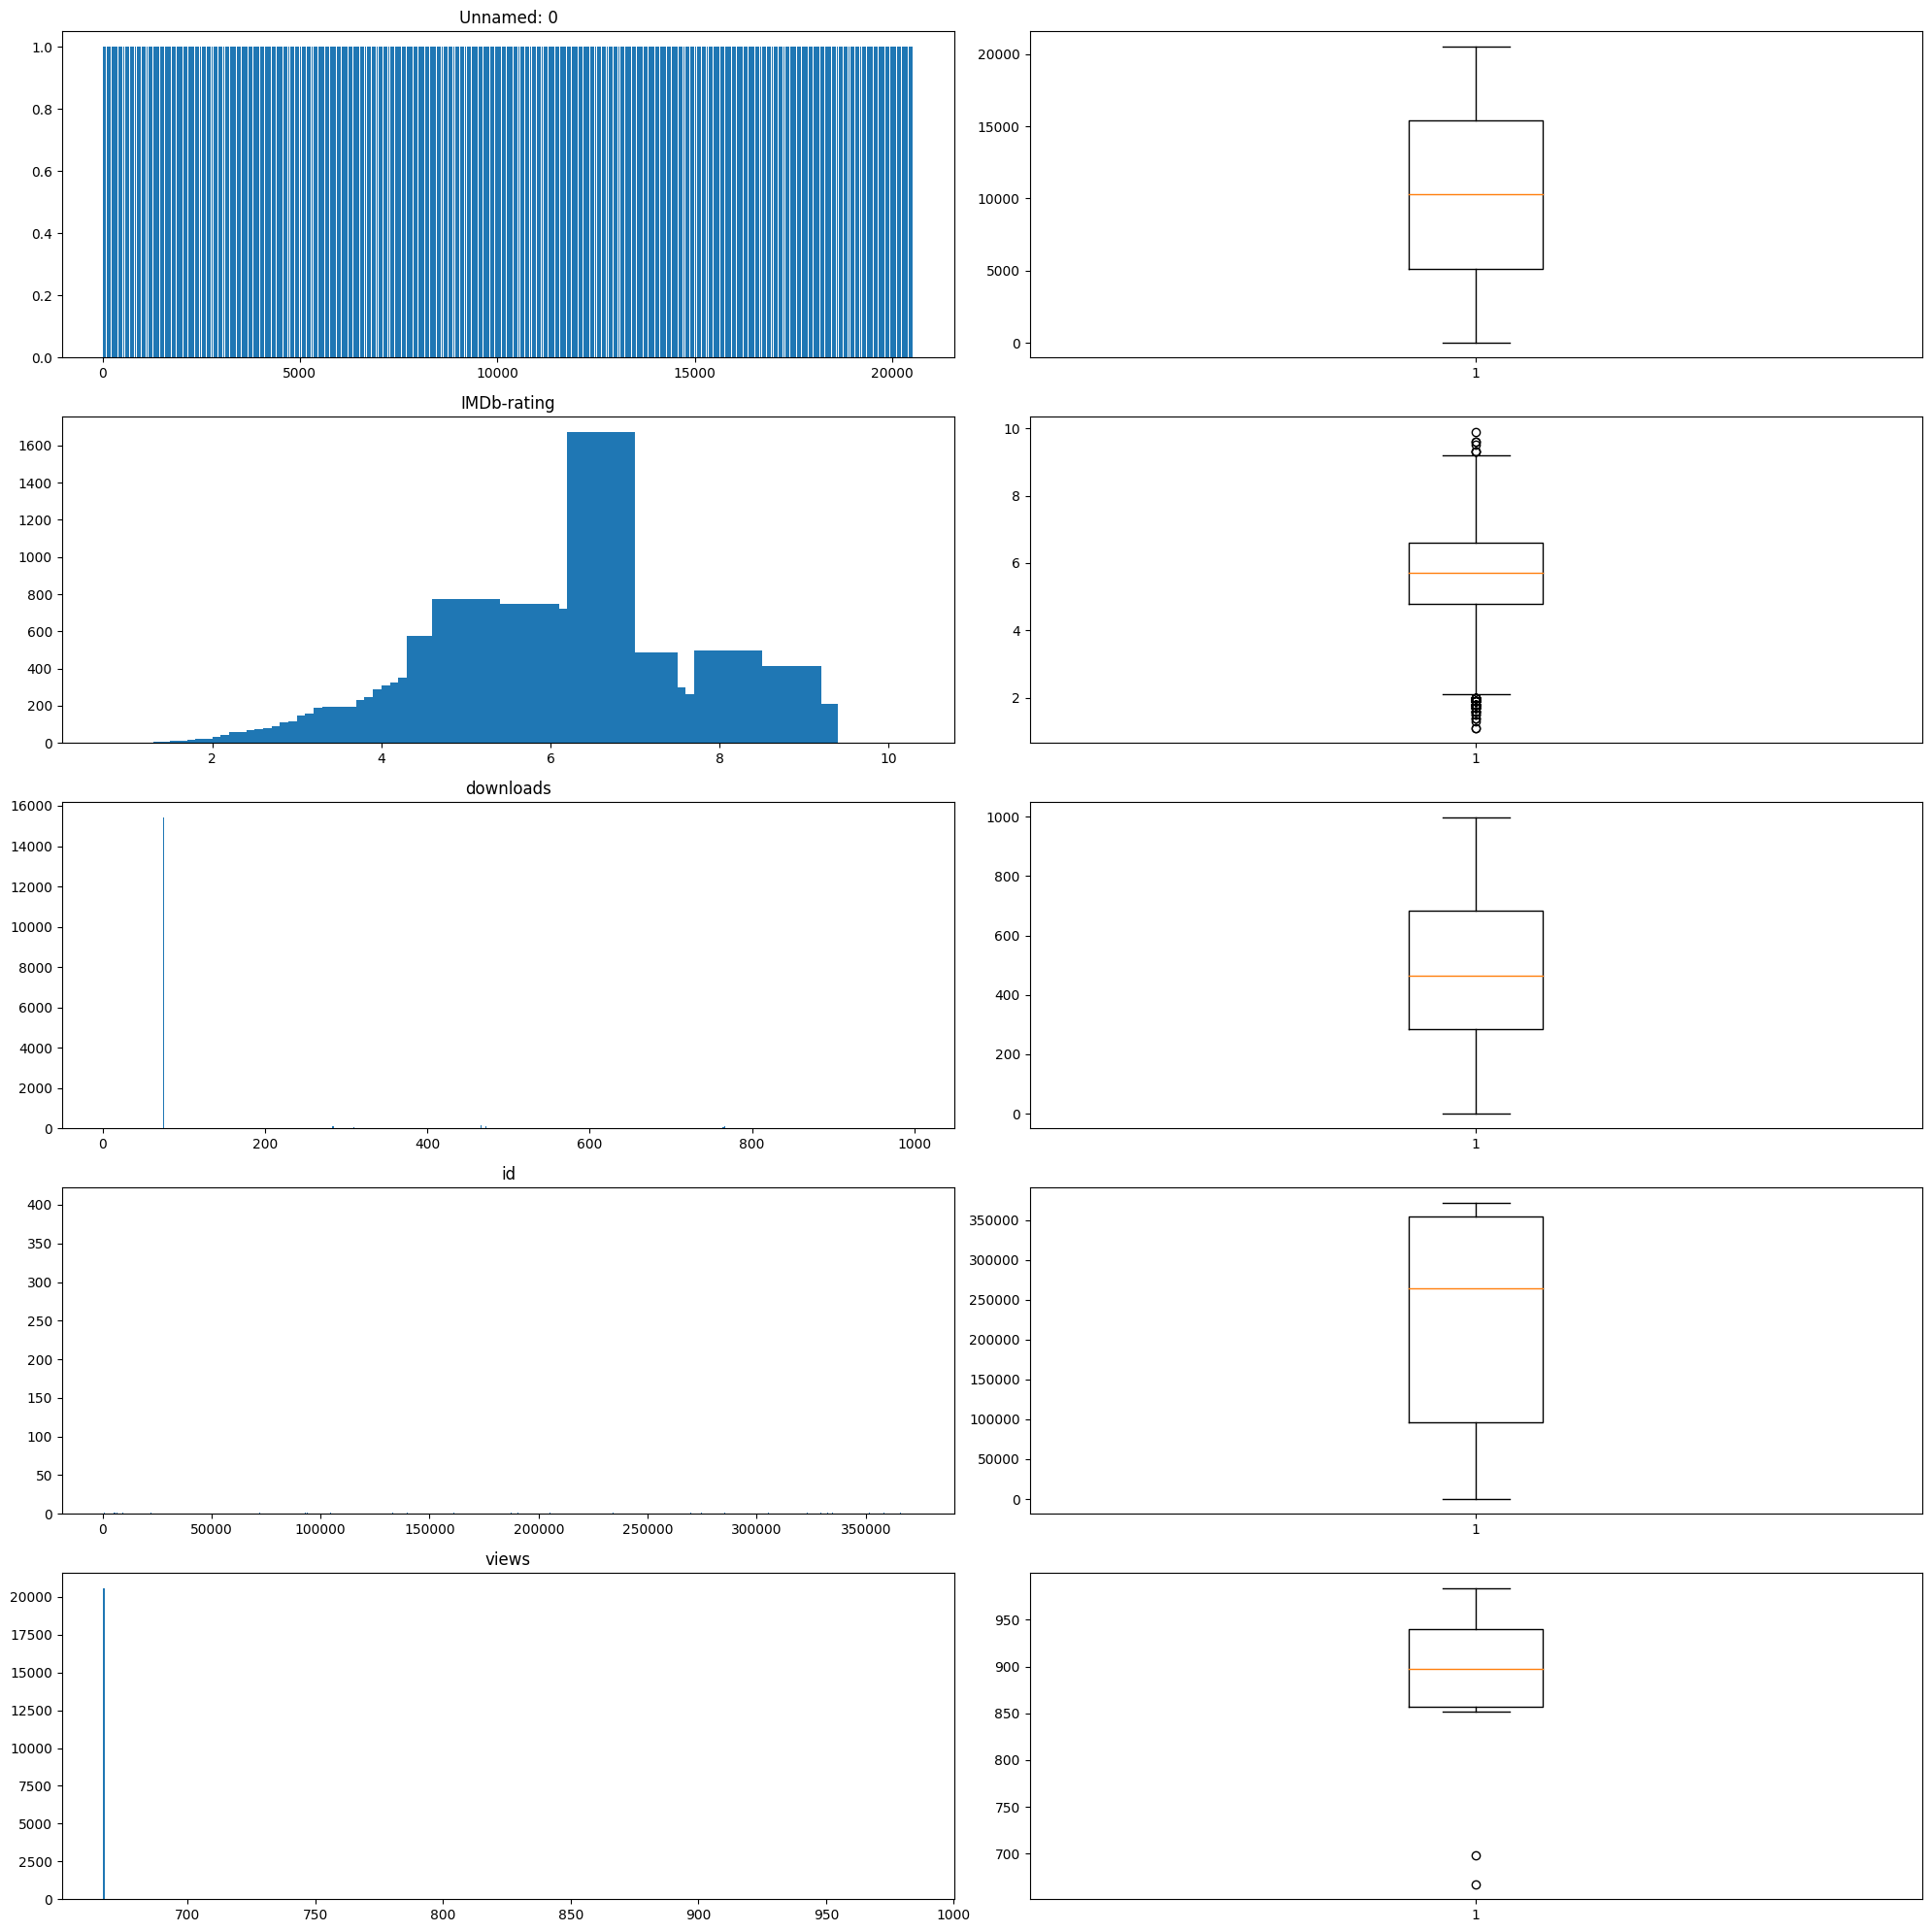

In [14]:
import warnings
warnings.filterwarnings("ignore")

df2 = pd.read_csv('movies_dataset.csv', low_memory=False)
df2["downloads"] = df2["downloads"].apply(pd.to_numeric, errors='coerce')
df2["id"] = df2["id"].apply(pd.to_numeric, errors='coerce')
df2["views"] = df2["views"].apply(pd.to_numeric, errors='coerce')

for i in process_col:
    df2[i][np.isnan(df[i])] = df2[i].mode()[0]

plt.figure(figsize=(20, 20))
for i, col in enumerate(value_col):
    plt.subplot(5, 2, 2*(i+1)-1)
    x = df2[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(df2[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.tight_layout()
    plt.bar(x, y)
    plt.subplot(5, 2, 2*(i+1))
    plt.boxplot(df[col][~np.isnan(df[col])])

plt.show()

3. 通过属性的相关关系来填补缺失值：使用corr()来计算数据表中各列之间的相关系数，选择相关性最高的列，使用相关性系数乘积的线性加合，来填充缺失值。

In [15]:
df3 = pd.read_csv('movies_dataset.csv', low_memory=False)
df3["downloads"] = df3["downloads"].apply(pd.to_numeric, errors='coerce')
df3["id"] = df3["id"].apply(pd.to_numeric, errors='coerce')
df3["views"] = df3["views"].apply(pd.to_numeric, errors='coerce')
corr = df3.corr()

df3["downloads"][np.isnan(df3["downloads"])] = df3["views"][np.isnan(df3["downloads"])]
df3["views"][np.isnan(df3["views"])] = df3["downloads"][np.isnan(df3["views"])]

df3

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,304.0,John Swab
1,1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,73.0,John Christian Plummer
2,2,5.2,R,Ben Wheatley,NaN,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,NaN,Ben Wheatley
3,3,8.1,NaN,Venky Atluri,NaN,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,NaN,Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,657.0,Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,20543,NaN,NaN,NaN,NaN,28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,NaN,NaN,Bhai-Bahen,NaN,NaN
20544,20544,7.7,NaN,Bimal Roy,NaN,28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,NaN,"Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,20545,8.0,NaN,NaN,NaN,30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,NaN,NaN
20546,20546,NaN,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,309.0,NaN


4. 通过数据对象之间的相似性来填补缺失值

这里用缺失值所在列的其他值来代表缺失值。对于数值属性使用均值填补；对于标称属性使用众数填补。

In [16]:
df4 = pd.read_csv('movies_dataset.csv', low_memory=False)
df4["downloads"] = df4["downloads"].apply(pd.to_numeric, errors='coerce')
df4["id"] = df4["id"].apply(pd.to_numeric, errors='coerce')
df4["views"] = df4["views"].apply(pd.to_numeric, errors='coerce')

In [17]:
na_columns = ['IMDb-rating', 'downloads','views', 'industry', 'language', 'posted_date', 'release_date', 'storyline', 'title', 'writer', 'appropriate_for', 'director', 'run_time']

for column in na_columns[:3]:
    df4[column].fillna(df[column].mean(), inplace=True)

for column in na_columns[3:]:
    df4[column].fillna(df[column].mode().iloc[0], inplace=True)

In [18]:
df4

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.800000,R,John Swab,304.000000,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,870.8,John Swab
1,1,6.400000,TV-PG,Paul Ziller,73.000000,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,870.8,John Christian Plummer
2,2,5.200000,R,Ben Wheatley,476.324436,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,870.8,Ben Wheatley
3,3,8.100000,R,Venky Atluri,476.324436,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,870.8,Venky Atluri
4,4,4.600000,R,Shaji Kailas,657.000000,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,870.8,Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,20543,5.762151,R,Venky Atluri,476.324436,28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,93,Follows\r\n a New York City family hiding out ...,Bhai-Bahen,870.8,Nicholas Schutt
20544,20544,7.700000,R,Bimal Roy,476.324436,28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,870.8,"Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,20545,8.000000,R,Venky Atluri,476.324436,30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,870.8,Nicholas Schutt
20546,20546,5.762151,R,Venky Atluri,309.000000,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,93,Follows\r\n a New York City family hiding out ...,TNA.Impact 2023-02-09,870.8,Nicholas Schutt


### 比较处理缺失值后数据集的差异

在此，通过数据摘要的形式对处理前后的数据集进行比较。

In [19]:
df.describe()

,Unnamed: 0,IMDb-rating,downloads,id,views
count,20548.000000,19707.000000,5545.000000,20548.000000,10.000000
mean,10273.500000,5.762151,476.324436,222351.199776,870.800000
std,5931.841001,1.374041,250.801276,138422.327931,108.163251
min,0.000000,1.100000,0.000000,1.000000,667.000000
25%,5136.750000,4.800000,284.000000,96122.250000,857.250000
50%,10273.500000,5.700000,466.000000,264457.500000,897.000000
75%,15410.250000,6.600000,683.000000,354561.250000,939.750000
max,20547.000000,9.900000,999.000000,372092.000000,984.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20548 non-null  int64  
 1   IMDb-rating      19707 non-null  float64
 2   appropriate_for  11072 non-null  object 
 3   director         18610 non-null  object 
 4   downloads        5545 non-null   float64
 5   id               20548 non-null  int64  
 6   industry         20547 non-null  object 
 7   language         20006 non-null  object 
 8   posted_date      20547 non-null  object 
 9   release_date     20547 non-null  object 
 10  run_time         18780 non-null  object 
 11  storyline        18847 non-null  object 
 12  title            20547 non-null  object 
 13  views            10 non-null     float64
 14  writer           18356 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 2.4+ MB


In [21]:
df2.describe()

,Unnamed: 0,IMDb-rating,downloads,id,views
count,20548.000000,20548.000000,20548.000000,20548.000000,20548.000000
mean,10273.500000,5.796442,183.299786,222351.199776,667.099182
std,5931.841001,1.355827,220.699118,138422.327931,5.032797
min,0.000000,1.100000,0.000000,1.000000,667.000000
25%,5136.750000,4.900000,75.000000,96122.250000,667.000000
50%,10273.500000,5.800000,75.000000,264457.500000,667.000000
75%,15410.250000,6.600000,75.000000,354561.250000,667.000000
max,20547.000000,9.900000,999.000000,372092.000000,984.000000


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20548 non-null  int64  
 1   IMDb-rating      20548 non-null  float64
 2   appropriate_for  11072 non-null  object 
 3   director         18610 non-null  object 
 4   downloads        20548 non-null  float64
 5   id               20548 non-null  int64  
 6   industry         20547 non-null  object 
 7   language         20006 non-null  object 
 8   posted_date      20547 non-null  object 
 9   release_date     20547 non-null  object 
 10  run_time         18780 non-null  object 
 11  storyline        18847 non-null  object 
 12  title            20547 non-null  object 
 13  views            20548 non-null  float64
 14  writer           18356 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 2.4+ MB


In [23]:
df3.describe()

,Unnamed: 0,IMDb-rating,downloads,id,views
count,20548.000000,19707.000000,5545.000000,20548.000000,5545.000000
mean,10273.500000,5.762151,476.324436,222351.199776,477.557800
std,5931.841001,1.374041,250.801276,138422.327931,251.086204
min,0.000000,1.100000,0.000000,1.000000,0.000000
25%,5136.750000,4.800000,284.000000,96122.250000,284.000000
50%,10273.500000,5.700000,466.000000,264457.500000,466.000000
75%,15410.250000,6.600000,683.000000,354561.250000,685.000000
max,20547.000000,9.900000,999.000000,372092.000000,999.000000


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20548 non-null  int64  
 1   IMDb-rating      19707 non-null  float64
 2   appropriate_for  11072 non-null  object 
 3   director         18610 non-null  object 
 4   downloads        5545 non-null   float64
 5   id               20548 non-null  int64  
 6   industry         20547 non-null  object 
 7   language         20006 non-null  object 
 8   posted_date      20547 non-null  object 
 9   release_date     20547 non-null  object 
 10  run_time         18780 non-null  object 
 11  storyline        18847 non-null  object 
 12  title            20547 non-null  object 
 13  views            5545 non-null   float64
 14  writer           18356 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 2.4+ MB


In [25]:
df4.describe()

,Unnamed: 0,IMDb-rating,downloads,id,views
count,20548.000000,20548.000000,20548.000000,20548.000000,20548.000000
mean,10273.500000,5.762151,476.324436,222351.199776,870.800000
std,5931.841001,1.345627,130.276818,138422.327931,2.263741
min,0.000000,1.100000,0.000000,1.000000,667.000000
25%,5136.750000,4.900000,476.324436,96122.250000,870.800000
50%,10273.500000,5.762151,476.324436,264457.500000,870.800000
75%,15410.250000,6.600000,476.324436,354561.250000,870.800000
max,20547.000000,9.900000,999.000000,372092.000000,984.000000


In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20548 non-null  int64  
 1   IMDb-rating      20548 non-null  float64
 2   appropriate_for  20548 non-null  object 
 3   director         20548 non-null  object 
 4   downloads        20548 non-null  float64
 5   id               20548 non-null  int64  
 6   industry         20548 non-null  object 
 7   language         20548 non-null  object 
 8   posted_date      20548 non-null  object 
 9   release_date     20548 non-null  object 
 10  run_time         20548 non-null  object 
 11  storyline        20548 non-null  object 
 12  title            20548 non-null  object 
 13  views            20548 non-null  float64
 14  writer           20548 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 2.4+ MB
